In [103]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from datetime import datetime, timedelta
import time
import warnings
import os


warnings.filterwarnings('ignore')

In [105]:
load_dotenv()

True

In [89]:
password = os.getenv("PASSWORD")

In [106]:
start_date = "2024-04-01"

'your_api_key_here'

In [60]:
response = requests.get('https://jsonplaceholder.typicode.com/users')
users_data = response.json()
df_users = pd.DataFrame(users_data)
df_users.head()


,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


In [61]:
response.json()

[{'id': 1,
  'name': 'Leanne Graham',
  'username': 'Bret',
  'email': 'Sincere@april.biz',
  'address': {'street': 'Kulas Light',
   'suite': 'Apt. 556',
   'city': 'Gwenborough',
   'zipcode': '92998-3874',
   'geo': {'lat': '-37.3159', 'lng': '81.1496'}},
  'phone': '1-770-736-8031 x56442',
  'website': 'hildegard.org',
  'company': {'name': 'Romaguera-Crona',
   'catchPhrase': 'Multi-layered client-server neural-net',
   'bs': 'harness real-time e-markets'}},
 {'id': 2,
  'name': 'Ervin Howell',
  'username': 'Antonette',
  'email': 'Shanna@melissa.tv',
  'address': {'street': 'Victor Plains',
   'suite': 'Suite 879',
   'city': 'Wisokyburgh',
   'zipcode': '90566-7771',
   'geo': {'lat': '-43.9509', 'lng': '-34.4618'}},
  'phone': '010-692-6593 x09125',
  'website': 'anastasia.net',
  'company': {'name': 'Deckow-Crist',
   'catchPhrase': 'Proactive didactic contingency',
   'bs': 'synergize scalable supply-chains'}},
 {'id': 3,
  'name': 'Clementine Bauch',
  'username': 'Samantha

In [62]:
def fetch_coinbase_with_pagination(max_pages=5):
    all_data = []
    url = 'https://api.coingecko.com/api/v3/coins/markets'
    
    for page in range(1, max_pages + 1):
        params = {
            'vs_currency': 'usd',
            'order': 'market_cap_desc',
            'per_page': 50,
            'page': page
        }
        
        response = requests.get(url, params=params)
        
        if response.status_code != 200:
            break
            
        data = response.json()
        
        if not data:
            break
            
        all_data.extend(data)
        time.sleep(1.5)
    
    return all_data

In [63]:
crypto_data = fetch_coinbase_with_pagination(max_pages=3)
df_crypto = pd.DataFrame(crypto_data)
df_crypto

,id,symbol,name,image,current_price,market_cap,market_cap_rank,fully_diluted_valuation,total_volume,high_24h,...,total_supply,max_supply,ath,ath_change_percentage,ath_date,atl,atl_change_percentage,atl_date,roi,last_updated
0,bitcoin,btc,Bitcoin,https://coin-images.coingecko.com/coins/images...,85393.000000,1703217982208,1,1703217982208,8.537913e+10,91572.000000,...,1.995636e+07,2.100000e+07,126080.000000,-32.25990,2025-10-06T18:57:42.558Z,67.810000,1.258518e+05,2013-07-06T00:00:00.000Z,None,2025-12-01T18:25:11.740Z
1,ethereum,eth,Ethereum,https://coin-images.coingecko.com/coins/images...,2753.450000,332007905041,2,332007905041,3.345842e+10,3040.160000,...,1.206955e+08,NaN,4946.050000,-44.34551,2025-08-24T19:21:03.333Z,0.432979,6.356580e+05,2015-10-20T00:00:00.000Z,"{'times': 42.128632956684356, 'currency': 'btc...",2025-12-01T18:25:11.554Z
2,tether,usdt,Tether,https://coin-images.coingecko.com/coins/images...,1.000000,184614372043,3,190081582839,1.113671e+11,1.000000,...,1.900720e+11,NaN,1.320000,-24.41664,2018-07-24T00:00:00.000Z,0.572521,7.467306e+01,2015-03-02T00:00:00.000Z,None,2025-12-01T18:25:24.454Z
3,ripple,xrp,XRP,https://coin-images.coingecko.com/coins/images...,2.010000,121066366941,4,200639544711,4.752542e+09,2.200000,...,9.998575e+10,1.000000e+11,3.650000,-44.94035,2025-07-18T03:40:53.808Z,0.002686,7.464044e+04,2014-05-22T00:00:00.000Z,None,2025-12-01T18:25:24.404Z
4,binancecoin,bnb,BNB,https://coin-images.coingecko.com/coins/images...,816.930000,112385968802,5,112385968165,2.432599e+09,896.860000,...,1.377362e+08,2.000000e+08,1369.990000,-40.34557,2025-10-13T08:41:24.131Z,0.039818,2.052406e+06,2017-10-19T00:00:00.000Z,None,2025-12-01T18:25:11.380Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,blockstack,stx,Stacks,https://coin-images.coingecko.com/coins/images...,0.277964,504694325,146,504694325,1.589424e+07,0.315464,...,1.814324e+09,NaN,3.860000,-92.80512,2024-04-01T12:34:58.342Z,0.045596,5.097704e+02,2020-03-13T02:29:26.415Z,"{'times': 1.3163665487394725, 'currency': 'usd...",2025-12-01T18:26:22.263Z
146,newton-project,ab,AB,https://coin-images.coingecko.com/coins/images...,0.005539,494400174,147,546705141,1.670275e+07,0.006027,...,9.882366e+10,1.000000e+11,0.017274,-67.97103,2025-03-22T08:04:44.760Z,0.000004,1.453100e+05,2022-10-11T02:32:18.937Z,"{'times': 1.308012122230738, 'currency': 'usd'...",2025-12-01T18:26:22.244Z
147,tezos,xtz,Tezos,https://coin-images.coingecko.com/coins/images...,0.461636,492756447,148,502018766,2.498844e+07,0.491613,...,1.087303e+09,NaN,9.120000,-94.93188,2021-10-04T00:41:18.025Z,0.350476,3.182457e+01,2018-12-07T00:00:00.000Z,"{'times': -0.017795265296174895, 'currency': '...",2025-12-01T18:26:22.252Z
148,true-usd,tusd,TrueUSD,https://coin-images.coingecko.com/coins/images...,0.996419,492735650,149,492735650,9.651579e+06,0.996768,...,4.945151e+08,NaN,1.620000,-38.41417,2018-08-26T20:41:09.375Z,0.883550,1.281474e+01,2020-03-12T10:47:51.380Z,None,2025-12-01T18:26:22.487Z


In [64]:
def parse_nested_json(data, key_path):
    keys = key_path.split('.')
    result = data
    
    for key in keys:
        if isinstance(result, dict):
            result = result.get(key)
        elif isinstance(result, list) and key.isdigit():
            result = result[int(key)]
        else:
            return None
            
    return result

In [108]:
response = requests.get('https://jsonplaceholder.typicode.com/users')
nested_data = response.json()

parsed_records = []
for item in nested_data:
    parsed_records.append({
        'id': parse_nested_json(item, 'id'),
        'name': parse_nested_json(item, 'name'),
        'username': parse_nested_json(item, 'username'),
        'email': parse_nested_json(item, 'email'),
        'city': parse_nested_json(item, 'address.city'),
        'street': parse_nested_json(item, 'address.street'),
        'zipcode': parse_nested_json(item, 'address.zipcode'),
        'lat': parse_nested_json(item, 'address.geo.lat'),
        'lng': parse_nested_json(item, 'address.geo.lng'),
        'company': parse_nested_json(item, 'company.name'),
        'company_slogan': parse_nested_json(item, 'company.catchPhrase'),
        'phone': parse_nested_json(item, 'phone')
    })

df_nested = pd.DataFrame(parsed_records)
df_nested.head()

,id,name,username,email,city,street,zipcode,lat,lng,company,company_slogan,phone
0,1,Leanne Graham,Bret,Sincere@april.biz,Gwenborough,Kulas Light,92998-3874,-37.3159,81.1496,Romaguera-Crona,Multi-layered client-server neural-net,1-770-736-8031 x56442
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,Wisokyburgh,Victor Plains,90566-7771,-43.9509,-34.4618,Deckow-Crist,Proactive didactic contingency,010-692-6593 x09125
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,McKenziehaven,Douglas Extension,59590-4157,-68.6102,-47.0653,Romaguera-Jacobson,Face to face bifurcated interface,1-463-123-4447
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,South Elvis,Hoeger Mall,53919-4257,29.4572,-164.2990,Robel-Corkery,Multi-tiered zero tolerance productivity,493-170-9623 x156
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,Roscoeview,Skiles Walks,33263,-31.8129,62.5342,Keebler LLC,User-centric fault-tolerant solution,(254)954-1289
5,6,Mrs. Dennis Schulist,Leopoldo_Corkery,Karley_Dach@jasper.info,South Christy,Norberto Crossing,23505-1337,-71.4197,71.7478,Considine-Lockman,Synchronised bottom-line interface,1-477-935-8478 x6430
6,7,Kurtis Weissnat,Elwyn.Skiles,Telly.Hoeger@billy.biz,Howemouth,Rex Trail,58804-1099,24.8918,21.8984,Johns Group,Configurable multimedia task-force,210.067.6132
7,8,Nicholas Runolfsdottir V,Maxime_Nienow,Sherwood@rosamond.me,Aliyaview,Ellsworth Summit,45169,-14.3990,-120.7677,Abernathy Group,Implemented secondary concept,586.493.6943 x140
8,9,Glenna Reichert,Delphine,Chaim_McDermott@dana.io,Bartholomebury,Dayna Park,76495-3109,24.6463,-168.8889,Yost and Sons,Switchable contextually-based project,(775)976-6794 x41206
9,10,Clementina DuBuque,Moriah.Stanton,Rey.Padberg@karina.biz,Lebsackbury,Kattie Turnpike,31428-2261,-38.2386,57.2232,Hoeger LLC,Centralized empowering task-force,024-648-3804


In [66]:
response = requests.get('https://api.open-meteo.com/v1/forecast?latitude=50.4501&longitude=30.5234&hourly=temperature_2m,precipitation,wind_speed_10m&past_days=7')
weather_data = response.json()

df_weather = pd.DataFrame({
    'time': weather_data['hourly']['time'],
    'temperature': weather_data['hourly']['temperature_2m'],
    'precipitation': weather_data['hourly']['precipitation'],
    'wind_speed': weather_data['hourly']['wind_speed_10m']
})

df_weather.head()

,time,temperature,precipitation,wind_speed
0,2025-11-24T00:00,2.7,0.0,9.8
1,2025-11-24T01:00,2.2,0.2,11.6
2,2025-11-24T02:00,1.8,0.2,7.9
3,2025-11-24T03:00,1.7,0.1,8.7
4,2025-11-24T04:00,1.7,0.0,9.8


In [67]:
np.random.seed(42)
dates = pd.date_range(start='2023-01-01', periods=365, freq='D')
categories = ['Electronics', 'Clothing', 'Food', 'Books', 'Toys']

csv_data = {
    'id': range(1, 366),
    'date': dates,
    'category': np.random.choice(categories, 365),
    'sales': np.random.randint(100, 1000, 365),
    'price': np.random.uniform(10, 500, 365).round(2),
    'quantity': np.random.randint(1, 20, 365),
    'customer_rating': np.random.uniform(1, 5, 365).round(1),
    'name': ['Product_' + str(i) for i in range(1, 366)]
}

df_csv = pd.DataFrame(csv_data)
df_csv.to_csv('sample_data.csv', index=False)
df_csv.head()

,id,date,category,sales,price,quantity,customer_rating,name
0,1,2023-01-01,Books,873,413.04,14,1.5,Product_1
1,2,2023-01-02,Toys,976,475.40,2,2.1,Product_2
2,3,2023-01-03,Food,983,365.60,1,1.1,Product_3
3,4,2023-01-04,Toys,449,310.57,18,2.7,Product_4
4,5,2023-01-05,Toys,146,214.94,7,4.4,Product_5


In [68]:
df = df_csv.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               365 non-null    int64         
 1   date             365 non-null    datetime64[ns]
 2   category         365 non-null    object        
 3   sales            365 non-null    int64         
 4   price            365 non-null    float64       
 5   quantity         365 non-null    int64         
 6   customer_rating  365 non-null    float64       
 7   name             365 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(2)
memory usage: 22.9+ KB


In [69]:
df = df.drop_duplicates()
print(f"Shape after removing duplicates: {df.shape}")

Shape after removing duplicates: (365, 8)


In [70]:
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [71]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

In [72]:
string_cols = df.select_dtypes(include=['object']).columns
for col in string_cols:
    if col != 'date':
        df[col] = df[col].astype(str).str.strip().str.lower()

In [73]:
df['date'] = pd.to_datetime(df['date'])

In [74]:
for col in numeric_cols:
    if col != 'id':
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        print(f"{col}: {outliers} outliers detected")

sales: 0 outliers detected
price: 0 outliers detected
quantity: 0 outliers detected
customer_rating: 0 outliers detected


In [75]:
df['total'] = df['price'] * df['quantity']
df['discounted_price'] = df['price'] * (1 - df['discount'])
df['revenue'] = df['discounted_price'] * df['quantity']

KeyError: 'discount'

In [29]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day_of_week'] = df['date'].dt.dayofweek
df['week_of_year'] = df['date'].dt.isocalendar().week
df['quarter'] = df['date'].dt.quarter

In [30]:
df['category_encoded'] = pd.Categorical(df['category']).codes

In [31]:
df.describe()

,id,date,sales,price,quantity,customer_rating,total,year,month,day_of_week,week_of_year,quarter,category_encoded
count,365.000000,365,365.000000,365.000000,365.000000,365.000000,365.000000,365.0,365.000000,365.000000,365.0,365.000000,365.000000
mean,183.000000,2023-07-02 00:00:00,556.660274,249.867918,9.904110,3.041918,2425.760521,2023.0,6.526027,3.008219,26.569863,2.509589,1.873973
min,1.000000,2023-01-01 00:00:00,100.000000,12.270000,1.000000,1.000000,37.740000,2023.0,1.000000,0.000000,1.0,1.000000,0.000000
25%,92.000000,2023-04-02 00:00:00,316.000000,123.780000,5.000000,2.100000,807.360000,2023.0,4.000000,1.000000,14.0,2.000000,1.000000
50%,183.000000,2023-07-02 00:00:00,560.000000,242.240000,10.000000,3.100000,1811.110000,2023.0,7.000000,3.000000,27.0,3.000000,2.000000
75%,274.000000,2023-10-01 00:00:00,788.000000,374.530000,14.000000,4.000000,3610.460000,2023.0,10.000000,5.000000,40.0,4.000000,3.000000
max,365.000000,2023-12-31 00:00:00,997.000000,499.860000,19.000000,5.000000,9374.410000,2023.0,12.000000,6.000000,52.0,4.000000,4.000000
std,105.510663,NaN,264.678417,140.144690,5.422188,1.123022,1990.213406,0.0,3.452584,2.006155,15.067565,1.118300,1.404665


In [32]:
category_stats = df.groupby('category').agg({
    'id': 'count',
    'price': ['mean', 'sum', 'std'],
    'revenue': ['sum', 'mean'],
    'rating': 'mean'
})
category_stats

KeyError: "Column(s) ['rating', 'revenue'] do not exist"

In [33]:
correlation_matrix = df[['price', 'quantity', 'discount', 'rating', 'revenue']].corr()
correlation_matrix

KeyError: "['discount', 'rating', 'revenue'] not in index"

In [34]:
time_series = df.groupby('date').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'id': 'count'
}).reset_index()

time_series['revenue_ma7'] = time_series['revenue'].rolling(window=7).mean()
time_series['revenue_ma30'] = time_series['revenue'].rolling(window=30).mean()
time_series.head()

KeyError: "Column(s) ['revenue'] do not exist"

In [35]:
monthly_revenue = df.groupby('month')['revenue'].sum()
monthly_revenue

KeyError: 'Column not found: revenue'

In [76]:
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
plt.rcParams['figure.dpi'] = 100

KeyError: 'rating'

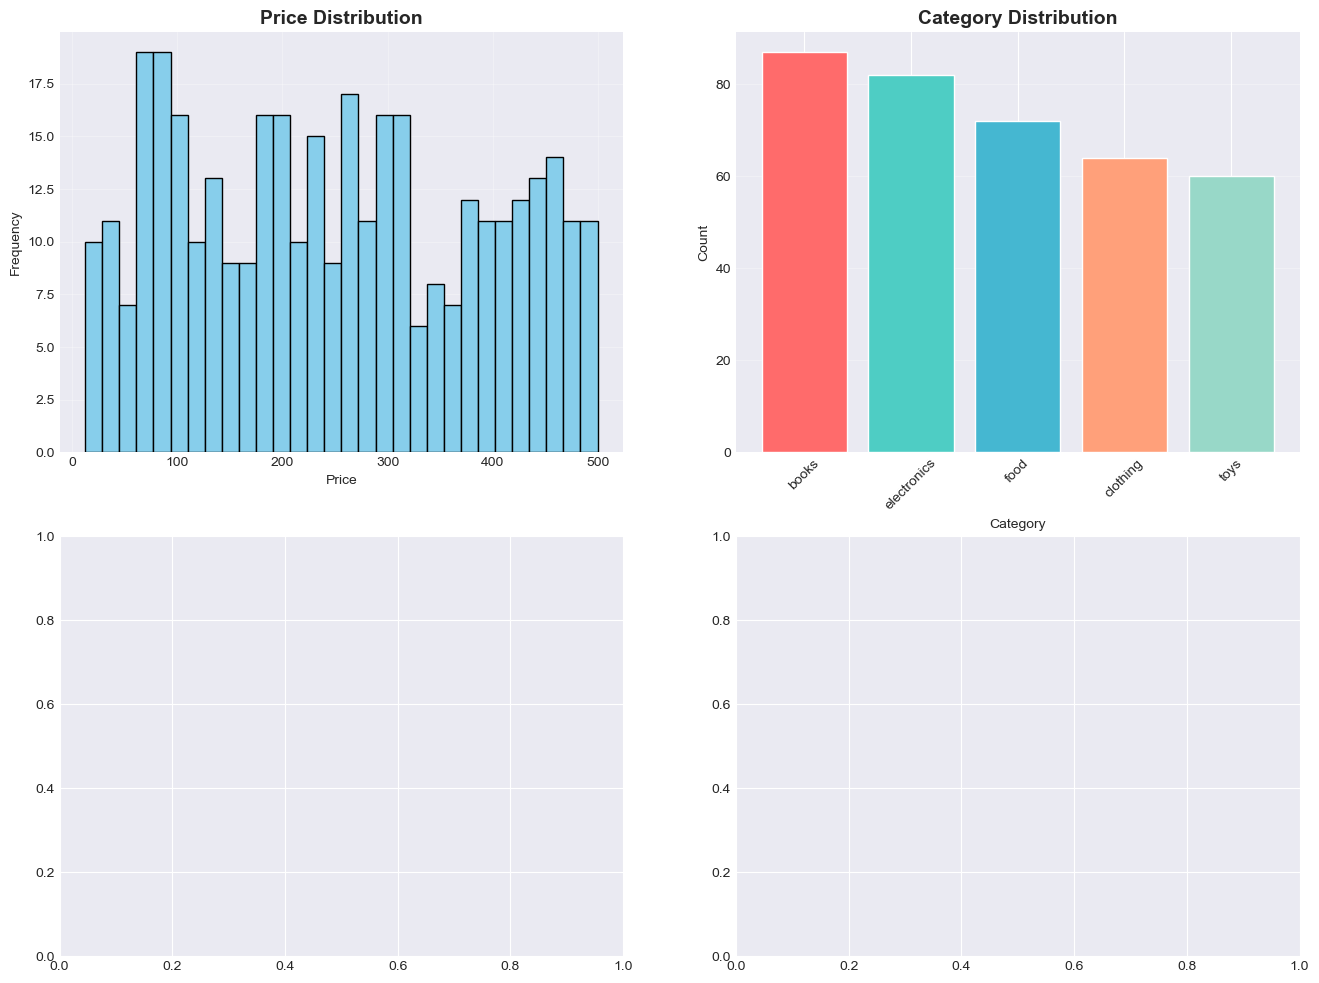

In [77]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

df['price'].hist(bins=30, ax=axes[0, 0], edgecolor='black', color='skyblue')
axes[0, 0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Price')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].grid(alpha=0.3)

category_counts = df['category'].value_counts()
axes[0, 1].bar(range(len(category_counts)), category_counts.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8'])
axes[0, 1].set_title('Category Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Category')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_xticks(range(len(category_counts)))
axes[0, 1].set_xticklabels(category_counts.index, rotation=45)
axes[0, 1].grid(alpha=0.3, axis='y')

axes[1, 0].scatter(df['price'], df['quantity'], alpha=0.5, c=df['rating'], 
                   cmap='viridis', s=50)
axes[1, 0].set_title('Price vs Quantity (colored by Rating)', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Price')
axes[1, 0].set_ylabel('Quantity')
axes[1, 0].grid(alpha=0.3)

box_data = [df['price'], df['quantity'], df['discount']*100, df['rating']]
bp = axes[1, 1].boxplot(box_data, patch_artist=True)
for patch, color in zip(bp['boxes'], ['lightblue', 'lightgreen', 'lightyellow', 'lightcoral']):
    patch.set_facecolor(color)
axes[1, 1].set_title('Box Plots', fontsize=14, fontweight='bold')
axes[1, 1].set_xticklabels(['Price', 'Quantity', 'Discount %', 'Rating'])
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8}, 
            fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

NameError: name 'correlation_matrix' is not defined

<Figure size 1000x800 with 0 Axes>

In [39]:
plt.figure(figsize=(16, 6))
plt.plot(time_series['date'], time_series['revenue'], 
         label='Daily Revenue', alpha=0.5, linewidth=1)
plt.plot(time_series['date'], time_series['revenue_ma7'], 
         label='7-Day MA', linewidth=2, color='red')
plt.plot(time_series['date'], time_series['revenue_ma30'], 
         label='30-Day MA', linewidth=2, color='green')
plt.title('Revenue Time Series with Moving Averages', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.legend(loc='best', fontsize=10)
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

NameError: name 'time_series' is not defined

<Figure size 1600x600 with 0 Axes>

KeyError: 'Column not found: revenue'

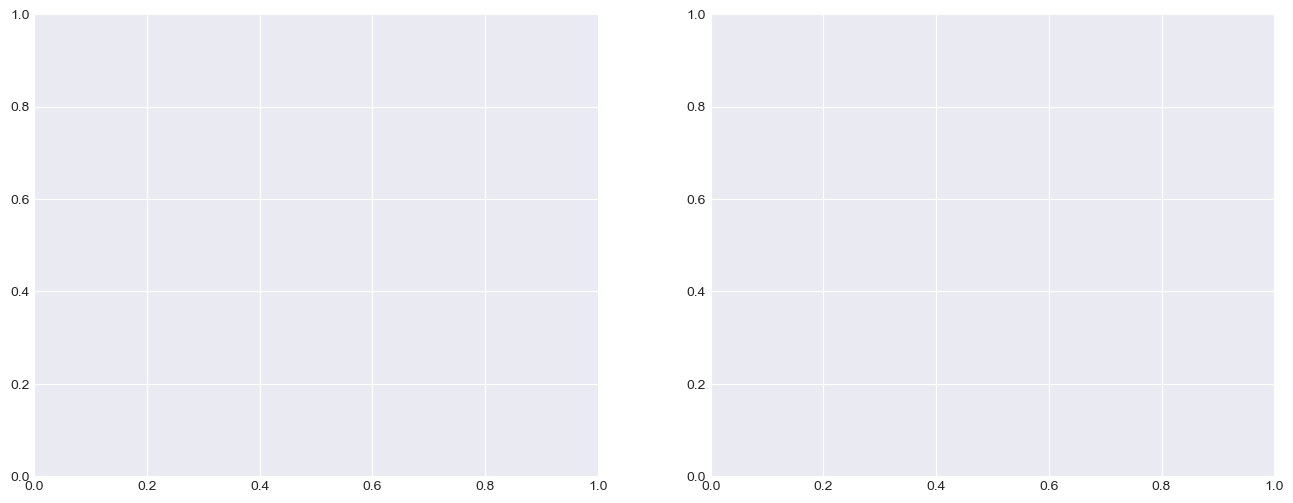

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

category_revenue = df.groupby('category')['revenue'].sum().sort_values()
colors = plt.cm.Spectral(np.linspace(0, 1, len(category_revenue)))
category_revenue.plot(kind='barh', ax=axes[0], color=colors)
axes[0].set_title('Total Revenue by Category', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Revenue', fontsize=12)
axes[0].grid(alpha=0.3, axis='x')

monthly_revenue.plot(kind='line', ax=axes[1], marker='o', linewidth=2, markersize=8)
axes[1].set_title('Revenue by Month', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month', fontsize=12)
axes[1].set_ylabel('Revenue', fontsize=12)
axes[1].grid(alpha=0.3)
axes[1].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

KeyError: 'Column not found: revenue'

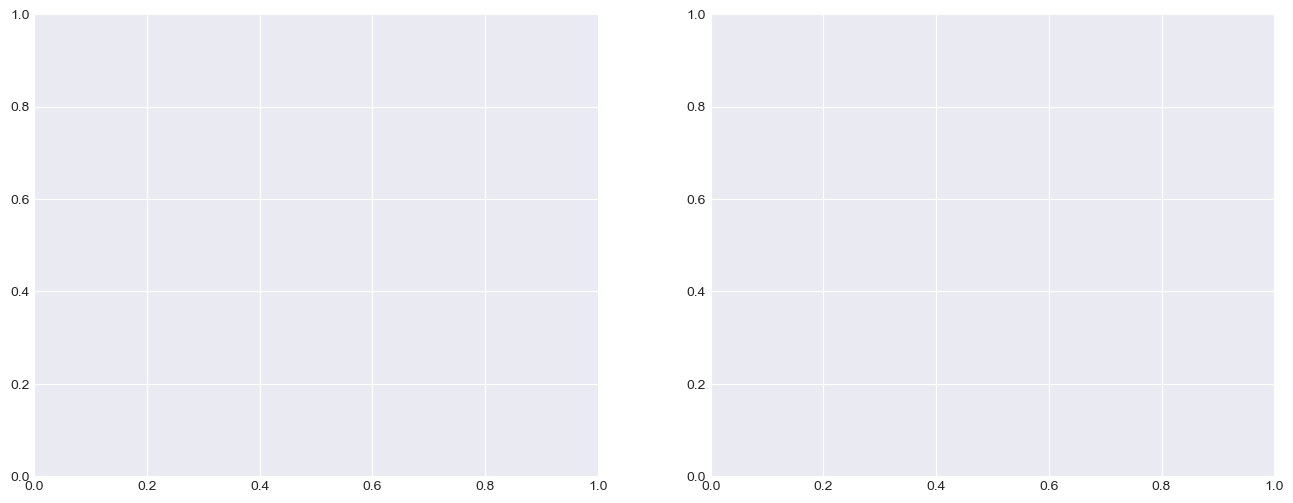

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

category_revenue_pie = df.groupby('category')['revenue'].sum()
axes[0].pie(category_revenue_pie, labels=category_revenue_pie.index, autopct='%1.1f%%',
            startangle=90, colors=plt.cm.Set3(range(len(category_revenue_pie))))
axes[0].set_title('Revenue Share by Category', fontsize=14, fontweight='bold')

sns.violinplot(data=df, x='category', y='price', ax=axes[1], palette='muted')
axes[1].set_title('Price Distribution by Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Category', fontsize=12)
axes[1].set_ylabel('Price', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

KeyError: 'Column not found: revenue'

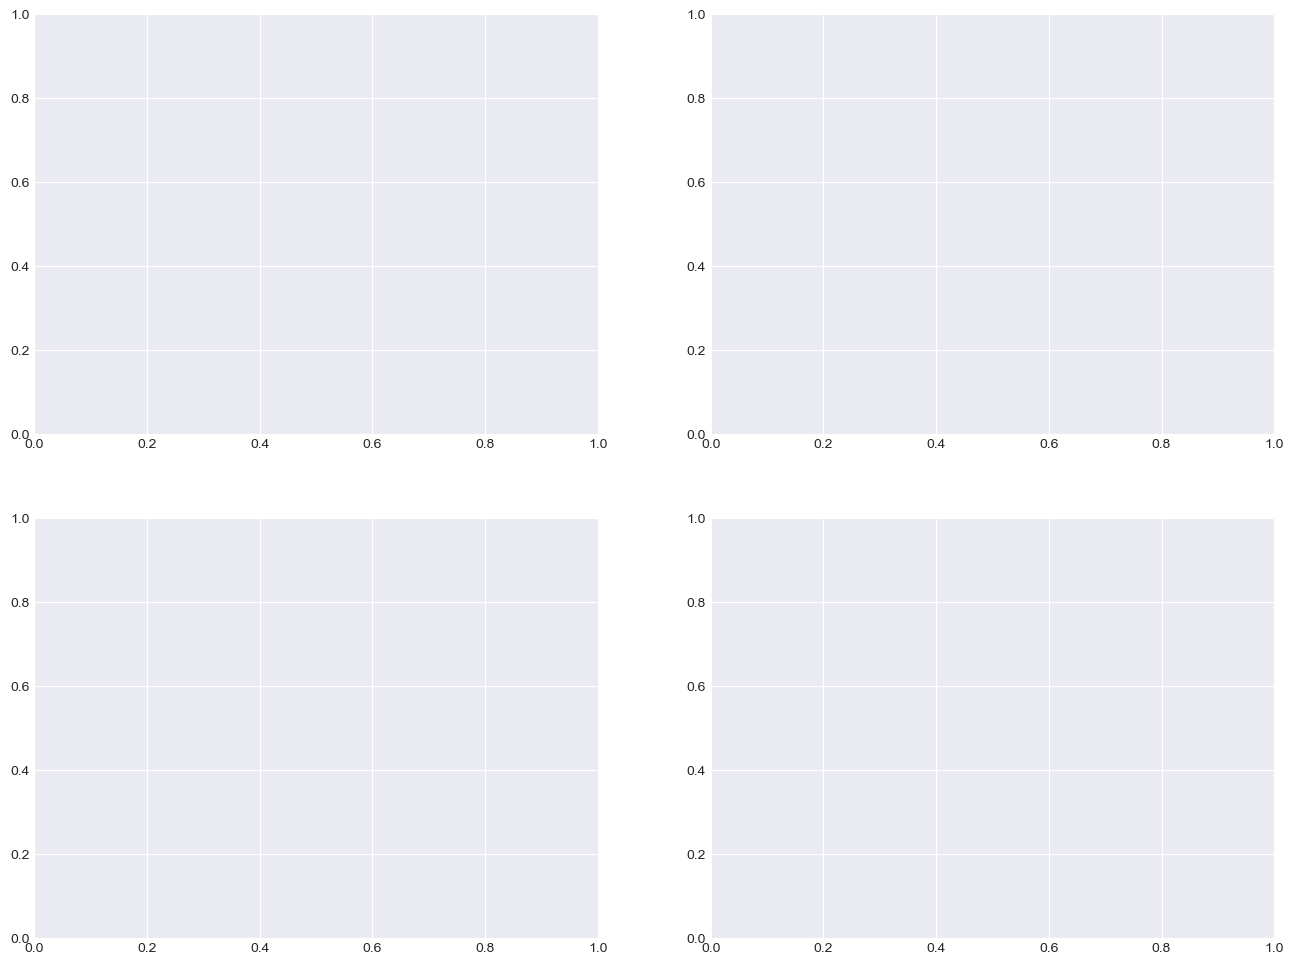

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

day_of_week_revenue = df.groupby('day_of_week')['revenue'].mean()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
axes[0, 0].bar(range(7), day_of_week_revenue.values, color='teal', alpha=0.7)
axes[0, 0].set_title('Average Revenue by Day of Week', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Day of Week')
axes[0, 0].set_ylabel('Average Revenue')
axes[0, 0].set_xticks(range(7))
axes[0, 0].set_xticklabels(days)
axes[0, 0].grid(alpha=0.3, axis='y')

sns.scatterplot(data=df, x='discount', y='revenue', hue='category', 
                ax=axes[0, 1], s=100, alpha=0.6)
axes[0, 1].set_title('Discount vs Revenue by Category', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Discount Rate')
axes[0, 1].set_ylabel('Revenue')
axes[0, 1].grid(alpha=0.3)

quarter_revenue = df.groupby('quarter')['revenue'].sum()
axes[1, 0].bar(quarter_revenue.index, quarter_revenue.values, 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[1, 0].set_title('Revenue by Quarter', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Quarter')
axes[1, 0].set_ylabel('Total Revenue')
axes[1, 0].set_xticks([1, 2, 3, 4])
axes[1, 0].grid(alpha=0.3, axis='y')

sns.boxplot(data=df, x='category', y='rating', ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Rating Distribution by Category', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Rating')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

In [43]:
pivot_table = df.pivot_table(values='revenue', index='month', 
                               columns='category', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.0f', cmap='YlGnBu', 
            linewidths=0.5, cbar_kws={'label': 'Revenue'})
plt.title('Revenue Heatmap: Category vs Month', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Month', fontsize=12)
plt.tight_layout()
plt.show()

KeyError: 'revenue'

In [ ]:
df_crypto_clean = df_crypto[['name', 'symbol', 'current_price', 'market_cap', 
                               'total_volume', 'price_change_percentage_24h']].head(20)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(df_crypto_clean['symbol'], df_crypto_clean['market_cap'], 
             color=plt.cm.viridis(np.linspace(0, 1, len(df_crypto_clean))))
axes[0].set_title('Top 20 Cryptocurrencies by Market Cap', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Market Cap (USD)')
axes[0].invert_yaxis()
axes[0].grid(alpha=0.3, axis='x')

colors_change = ['green' if x > 0 else 'red' for x in df_crypto_clean['price_change_percentage_24h']]
axes[1].barh(df_crypto_clean['symbol'], df_crypto_clean['price_change_percentage_24h'], 
             color=colors_change, alpha=0.7)
axes[1].set_title('24h Price Change %', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Price Change (%)')
axes[1].axvline(x=0, color='black', linestyle='--', linewidth=0.8)
axes[1].invert_yaxis()
axes[1].grid(alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

In [ ]:
df_weather['time'] = pd.to_datetime(df_weather['time'])

fig, axes = plt.subplots(3, 1, figsize=(16, 12))

axes[0].plot(df_weather['time'], df_weather['temperature'], 
             linewidth=2, color='orangered')
axes[0].fill_between(df_weather['time'], df_weather['temperature'], 
                      alpha=0.3, color='orange')
axes[0].set_title('Temperature Over Time', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Temperature (°C)')
axes[0].grid(alpha=0.3)

axes[1].bar(df_weather['time'], df_weather['precipitation'], 
            width=0.03, color='steelblue', alpha=0.7)
axes[1].set_title('Precipitation Over Time', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Precipitation (mm)')
axes[1].grid(alpha=0.3)

axes[2].plot(df_weather['time'], df_weather['wind_speed'], 
             linewidth=2, color='green')
axes[2].fill_between(df_weather['time'], df_weather['wind_speed'], 
                      alpha=0.3, color='lightgreen')
axes[2].set_title('Wind Speed Over Time', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Time')
axes[2].set_ylabel('Wind Speed (km/h)')
axes[2].grid(alpha=0.3)

for ax in axes:
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
df.to_csv('processed_data.csv', index=False)
df.to_parquet('processed_data.parquet', index=False)
df_crypto.to_csv('crypto_data.csv', index=False)
df_weather.to_csv('weather_data.csv', index=False)
print("Data saved successfully!")